In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [2]:
df = yf.download('BTC-USD', start='2024-01-01', end='2024-12-31', interval='1d').get('Close')
df.head()

[*********************100%***********************]  1 of 1 completed


Ticker,BTC-USD
Date,
2024-01-01,44167.332031
2024-01-02,44957.968750
2024-01-03,42848.175781
2024-01-04,44179.921875
2024-01-05,44162.691406


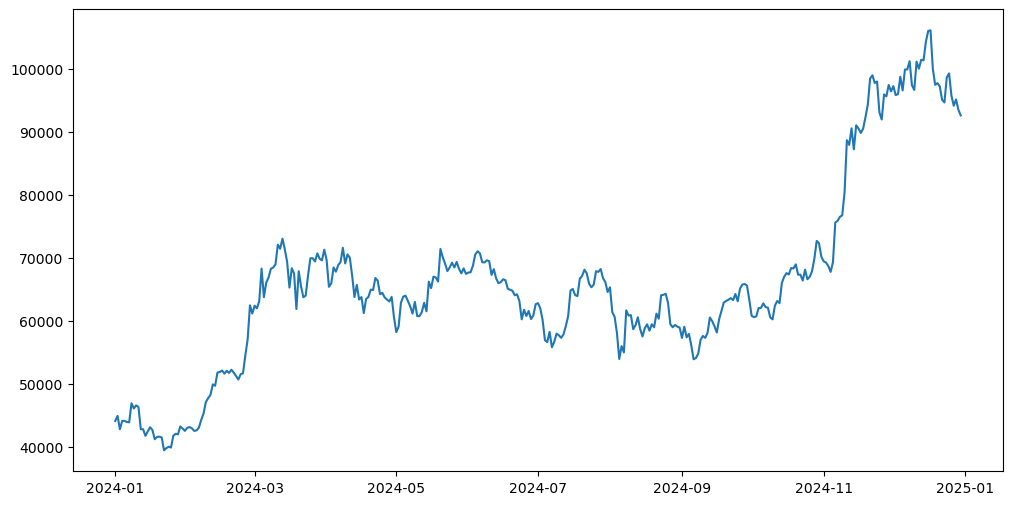

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(df['BTC-USD'])


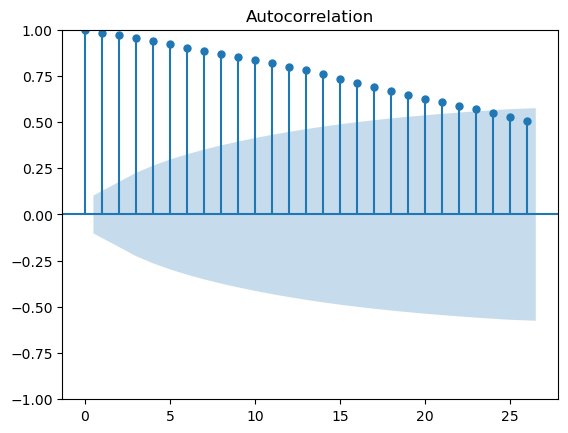

In [11]:
acf = plot_acf(df['BTC-USD'].dropna())

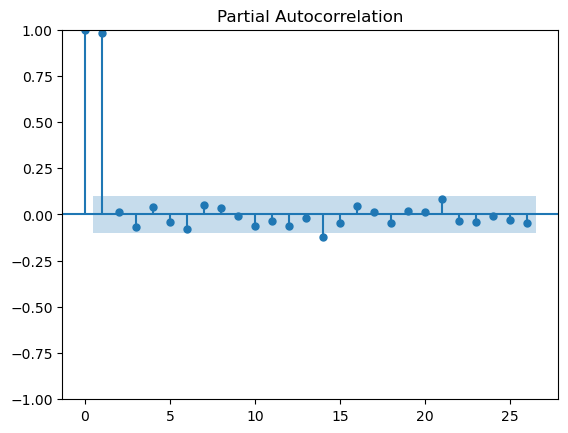

In [13]:
pacf= plot_pacf(df['BTC-USD'].dropna())

In [4]:
df['return'] = df['BTC-USD'].pct_change()

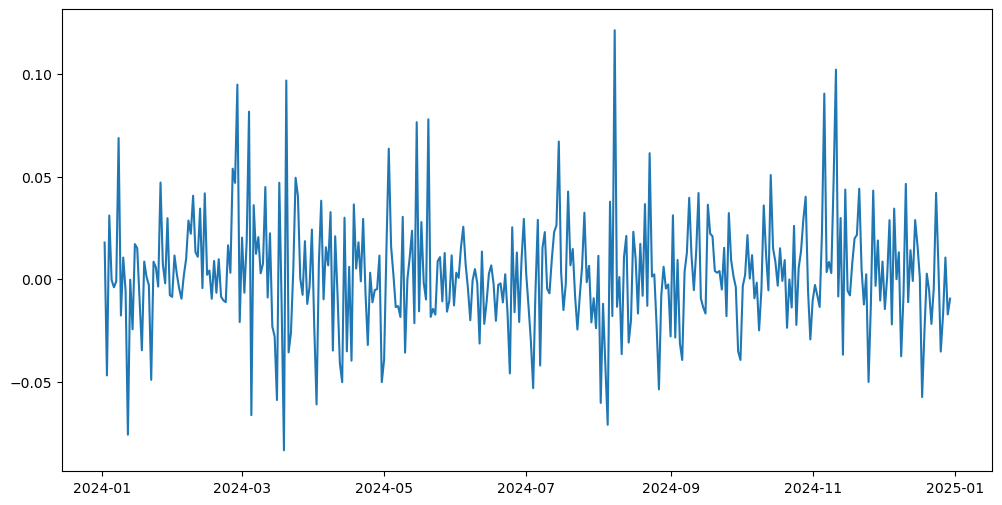

In [5]:
plt.figure(figsize=(12, 6))
plt.plot(df['return'])

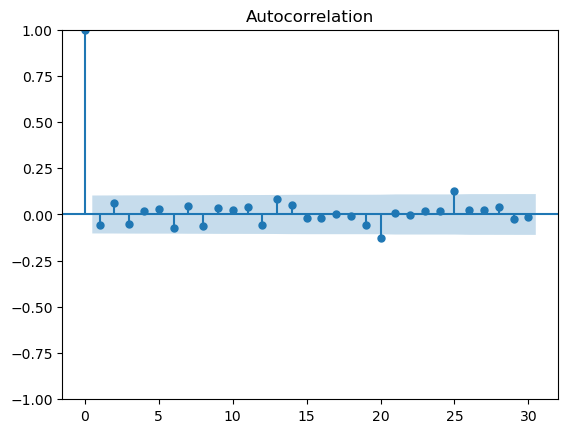

In [6]:
acf = plot_acf(df['return'].dropna(), lags=30)

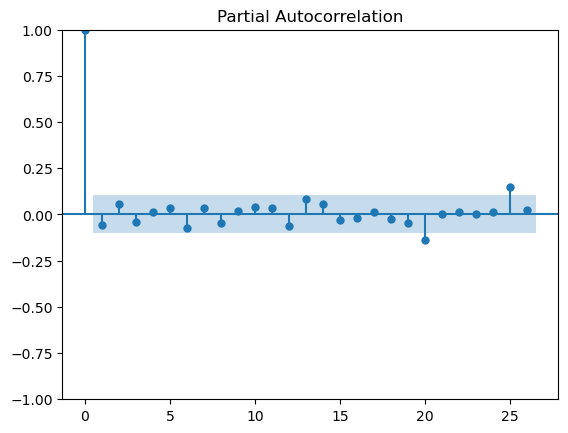

In [7]:
pacf= plot_pacf(df['return'].dropna())

In [9]:
#dicky fuller test FOR btc price
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['BTC-USD'])
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-0.979304965904785, 0.7607373111074912, 0, 364, {'1%': -3.4484434475193777, '5%': -2.869513170510808, '10%': -2.571017574266393}, 6218.266149985822)
ADF Statistic: -0.979305
p-value: 0.760737


In [8]:
#dicky fuller test for return series
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['return'].dropna())
print(result)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

(-20.144458309175608, 0.0, 0, 363, {'1%': -3.448493650810824, '5%': -2.8695352280356556, '10%': -2.5710293341377715}, -1493.9429808810364)
ADF Statistic: -20.144458
p-value: 0.000000
